In [1]:
# 영상처리를 위해 필요한 라이브러리를 임포트합니다.
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# Colab 환경에서는 이미지를 직접 업로드해야 하므로 아래 코드를 실행하세요.
uploaded = files.upload()

Saving lenna.bmp to lenna.bmp


In [2]:
# 이미지를 흑백(그레이스케일)으로 불러옵니다.
src = cv2.imread('/content/lenna.bmp', cv2.IMREAD_GRAYSCALE)

# 이미지가 정상적으로 불러와졌는지 확인합니다.
if src is None:
    print('Image load failed!')
else:
    print('Image loaded successfully!')

Image loaded successfully!


이미지를 흑백으로 불러오고, 제대로 불러와졌는지 확인합니다.
이미지가 없거나 파일명이 다르면 오류가 발생하니 주의하세요.

In [3]:
# 히스토그램을 보기 좋은 이미지로 만들어주는 함수입니다.
def getGrayHistImage(hist):
    imgHist = np.full((100, 256), 255, dtype=np.uint8)  # 100x256의 흰색 배경
    histMax = np.max(hist)  # 히스토그램 값 중 최대값

    for x in range(256):
        pt1 = (x, 100)
        pt2 = (x, 100 - int(hist[x, 0] * 100 / histMax))  # 최대값 높이 100에 맞추기
        cv2.line(imgHist, pt1, pt2, 0)  # 검은색 선 그리기

    return imgHist

히스토그램 데이터를 실제 이미지로 그려주는 함수입니다.
각 밝기값(0~255)에 대해 픽셀의 개수를 선으로 표시합니다.

In [4]:
# OpenCV를 이용한 정규화(히스토그램 스트레칭)
gmin, gmax, _, _ = cv2.minMaxLoc(src)  # 최소, 최대 밝기값 찾기
dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)  # 밝기값 전체를 0~255로 늘리기

# (참고) numpy로 정규화하는 방법
# gmin = np.min(src)
# gmax = np.max(src)
# dst = np.clip((src-gmin)*255./(gmax-gmin), 0, 255).astype(np.uint8)

히스토그램 스트레칭은 이미지의 명암 대비를 높여줍니다.
원본 이미지의 가장 어두운 픽셀을 0, 가장 밝은 픽셀을 255로 맞추는 방식입니다.

In [5]:
# 원본 이미지의 히스토그램 계산
hist_src = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_img_src = getGrayHistImage(hist_src)

# 정규화된 이미지의 히스토그램 계산
hist_dst = cv2.calcHist([dst], [0], None, [256], [0, 256])
hist_img_dst = getGrayHistImage(hist_dst)

각 이미지(원본/정규화)의 밝기값 분포(히스토그램)를 계산하고,
시각적으로 확인할 수 있는 이미지로 변환합니다.

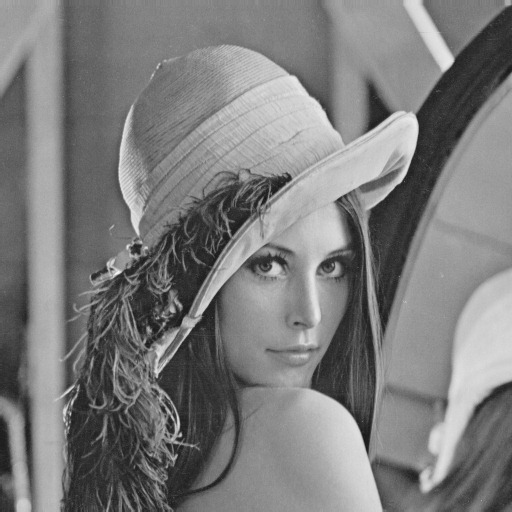

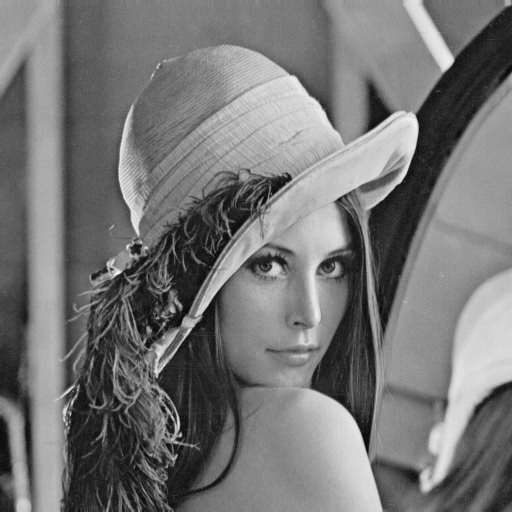

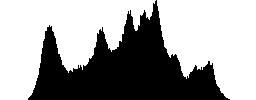

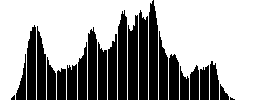

In [6]:
# 원본 이미지, 정규화된 이미지, 각 히스토그램을 화면에 출력합니다.
cv2_imshow(src)
cv2_imshow(dst)
cv2_imshow(hist_img_src)
cv2_imshow(hist_img_dst)

원본과 정규화된 이미지를 비교하고, 각각의 밝기 분포가 어떻게 달라졌는지 히스토그램을 통해 확인할 수 있습니다.

정규화된 히스토그램을 보면, 원본에는 없던 "일정 간격"의 흰색 선(히스토그램 값이 0, 즉 픽셀이 없는 밝기값)이 여러 개 생깁니다.

정규화 과정에서의 값 비약(jump):
정규화는 모든 픽셀의 값을 다음과 같이 변환합니다:
dst = (src - gmin) * 255 / (gmax - gmin)

이때, 원본 이미지에서 사용된 밝기값이 예를 들어 50, 51, 52, ..., 90만 있었다고 하면,
정규화 후에는 그 값들이 0~255로 "늘어나지만", 중간중간 밝기값(예: 17, 18, 19, ...)은 아예 등장하지 않을 수 있습니다.

픽셀 값 분포가 띄엄띄엄:
즉, 원본에 없는 밝기값은 정규화 후에도 여전히 픽셀이 할당되지 않으므로,
히스토그램에서 해당 밝기값에 해당하는 막대는 0(흰색 선)으로 남아 있습니다.

정규화는 이미지의 밝기 대비를 늘려주지만,
원본 이미지에 없던 밝기값(픽셀이 없는 값)은 정규화 후에도 0으로 남아서,
히스토그램에 "띄엄띄엄 흰색 선"이 나타나는 것입니다.

정규화는 이미지의 밝기 대비를 넓혀주지만,
원본에 없는 밝기값(픽셀이 없는 값)은 정규화 후에도 빈 값으로 남습니다.
히스토그램의 흰색 선은 "정규화 후에도 픽셀이 할당되지 않은 밝기값"을 나타냅니다.